In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

prenoms= pd.read_csv("dpt2018.csv",sep=";")
prenoms

,sexe,preusuel,annais,dpt,nombre
0,1,A,XXXX,XX,27
1,1,AADAM,XXXX,XX,27
2,1,AADEL,XXXX,XX,55
3,1,AADIL,1983,84,3
4,1,AADIL,1992,92,3
...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3
3624990,2,ÉYA,XXXX,XX,23
3624991,2,ÏNAYA,XXXX,XX,21
3624992,2,ÖZGE,XXXX,XX,30


In [4]:
top20 = prenoms.groupby("preusuel").nombre.sum().sort_values()[-20:]
top20

preusuel
DOMINIQUE          409919
PAUL               416412
ROBERT             419297
ROGER              423873
DANIEL             435021
MARCEL             467850
CLAUDE             468445
BERNARD            469399
JACQUES            482812
ALAIN              506899
RENÉ               516739
LOUIS              517774
PHILIPPE           538661
JEANNE             556074
ANDRÉ              712568
MICHEL             820459
PIERRE             891894
_PRENOMS_RARES    1575032
JEAN              1917129
MARIE             2260236
Name: nombre, dtype: int64

Text(0.5, 1.0, 'Vocume des 20 prénoms les plus donnés entre 1900 et 2018')

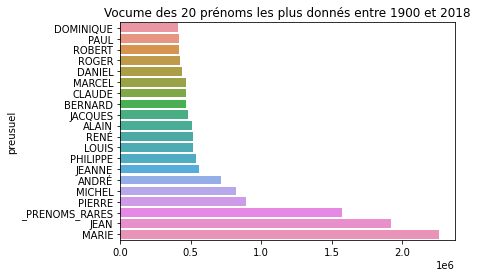

In [5]:
import seaborn as sns
sns.barplot(y=top20.index, x=top20.values).set_title("Vocume des 20 prénoms les plus donnés entre 1900 et 2018")

## Creating comums, mapping data using dicts, map, replace

In [6]:
dep= pd.read_csv("departement2019.csv",sep=",")
dep

,dep,reg,cheflieu,tncc,ncc,nccenr,libelle
0,01,84,01053,5,AIN,Ain,Ain
1,02,32,02408,5,AISNE,Aisne,Aisne
2,03,84,03190,5,ALLIER,Allier,Allier
3,04,93,04070,4,ALPES DE HAUTE PROVENCE,Alpes-de-Haute-Provence,Alpes-de-Haute-Provence
4,05,93,05061,4,HAUTES ALPES,Hautes-Alpes,Hautes-Alpes
...,...,...,...,...,...,...,...
96,971,1,97105,3,GUADELOUPE,Guadeloupe,Guadeloupe
97,972,2,97209,3,MARTINIQUE,Martinique,Martinique
98,973,3,97302,3,GUYANE,Guyane,Guyane
99,974,4,97411,0,LA REUNION,La Réunion,La Réunion


In [7]:
# COUNTING LINES : nb de lignes différentes par départements
prenoms['dpt'].value_counts()

75    123032
59    100471
69     77729
13     76100
62     66293
       ...  
09     15120
05     14692
04     13148
23     12422
48     11048
Name: dpt, Length: 100, dtype: int64

In [8]:
# COUNTING UNIQUE VALUES : nb de départements unique 
prenoms ['dpt'].nunique()

100

In [9]:
# CREATION D'UN DICTIONNAIRE
depdict=dict(zip(dep.dep, dep.libelle))
depdict

{'01': 'Ain',
 '02': 'Aisne',
 '03': 'Allier',
 '04': 'Alpes-de-Haute-Provence',
 '05': 'Hautes-Alpes',
 '06': 'Alpes-Maritimes',
 '07': 'Ardèche',
 '08': 'Ardennes',
 '09': 'Ariège',
 '10': 'Aube',
 '11': 'Aude',
 '12': 'Aveyron',
 '13': 'Bouches-du-Rhône',
 '14': 'Calvados',
 '15': 'Cantal',
 '16': 'Charente',
 '17': 'Charente-Maritime',
 '18': 'Cher',
 '19': 'Corrèze',
 '21': "Côte-d'Or",
 '22': "Côtes-d'Armor",
 '23': 'Creuse',
 '24': 'Dordogne',
 '25': 'Doubs',
 '26': 'Drôme',
 '27': 'Eure',
 '28': 'Eure-et-Loir',
 '29': 'Finistère',
 '2A': 'Corse-du-Sud',
 '2B': 'Haute-Corse',
 '30': 'Gard',
 '31': 'Haute-Garonne',
 '32': 'Gers',
 '33': 'Gironde',
 '34': 'Hérault',
 '35': 'Ille-et-Vilaine',
 '36': 'Indre',
 '37': 'Indre-et-Loire',
 '38': 'Isère',
 '39': 'Jura',
 '40': 'Landes',
 '41': 'Loir-et-Cher',
 '42': 'Loire',
 '43': 'Haute-Loire',
 '44': 'Loire-Atlantique',
 '45': 'Loiret',
 '46': 'Lot',
 '47': 'Lot-et-Garonne',
 '48': 'Lozère',
 '49': 'Maine-et-Loire',
 '50': 'Manche',
 '

In [10]:
# AFFICHAGE UNIQUEMENT = PAS DE MODIF DANS LE DATAFRAME
prenoms['dpt'].replace(depdict)

0                      XX
1                      XX
2                      XX
3                Vaucluse
4          Hauts-de-Seine
                ...      
3624989             Rhône
3624990                XX
3624991                XX
3624992                XX
3624993                XX
Name: dpt, Length: 3624994, dtype: object

In [11]:
# CREATION D'UNE NOUVELLE COLONNE AVEC NOM DÉPARTEMENT
prenoms['nomdep']=prenoms['dpt'].replace(depdict)

In [12]:
prenoms

,sexe,preusuel,annais,dpt,nombre,nomdep
0,1,A,XXXX,XX,27,XX
1,1,AADAM,XXXX,XX,27,XX
2,1,AADEL,XXXX,XX,55,XX
3,1,AADIL,1983,84,3,Vaucluse
4,1,AADIL,1992,92,3,Hauts-de-Seine
...,...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3,Rhône
3624990,2,ÉYA,XXXX,XX,23,XX
3624991,2,ÏNAYA,XXXX,XX,21,XX
3624992,2,ÖZGE,XXXX,XX,30,XX


In [13]:
# UTILISATION DE LAMBDA : PERMET DE DÉFINIR UNE FONCTION EN UNE LIGNE
prenoms['genre']=prenoms['sexe'].map(lambda x: "H" if x==1 else "F")

In [14]:
prenoms

,sexe,preusuel,annais,dpt,nombre,nomdep,genre
0,1,A,XXXX,XX,27,XX,H
1,1,AADAM,XXXX,XX,27,XX,H
2,1,AADEL,XXXX,XX,55,XX,H
3,1,AADIL,1983,84,3,Vaucluse,H
4,1,AADIL,1992,92,3,Hauts-de-Seine,H
...,...,...,...,...,...,...,...
3624989,2,ÉYA,2014,69,3,Rhône,F
3624990,2,ÉYA,XXXX,XX,23,XX,F
3624991,2,ÏNAYA,XXXX,XX,21,XX,F
3624992,2,ÖZGE,XXXX,XX,30,XX,F


# Firstname diversity study

In [15]:
nat = pd.read_csv("nat2018.csv", sep=";")
#nat = pd.read_csv("https://www.insee.fr/fr/statistiques/fichier/2540004/nat2018_csv.zip", sep=";")
#![groupby - apply - combine](Groupby-Apply-Combine.jpeg)
nat

,sexe,preusuel,annais,nombre
0,1,A,1980,3
1,1,A,1998,3
2,1,A,XXXX,21
3,1,AADAM,2009,4
4,1,AADAM,2014,3
...,...,...,...,...
636469,2,ÖZLEM,2013,3
636470,2,ÖZLEM,2014,5
636471,2,ÖZLEM,2015,3
636472,2,ÖZLEM,2016,3


In [16]:
nat=nat[nat.annais!="XXXX"]
nat

,sexe,preusuel,annais,nombre
0,1,A,1980,3
1,1,A,1998,3
3,1,AADAM,2009,4
4,1,AADAM,2014,3
5,1,AADAM,2016,4
...,...,...,...,...
636468,2,ÖZLEM,2012,6
636469,2,ÖZLEM,2013,3
636470,2,ÖZLEM,2014,5
636471,2,ÖZLEM,2015,3


In [17]:
#Proportion des naissances avec un prenom par rapport à la somme des naissances pour cette anne

def add_prop(group):
    group['prop'] = group.nombre / group.nombre.sum()
    return group

nat = nat.groupby(['annais', 'sexe']).apply(add_prop)

nat.sort_values(by='prop')

,sexe,preusuel,annais,nombre,prop
87754,1,FLOREAL,1971,3,0.000006
266582,1,TOUFFIK,1971,3,0.000006
209732,1,OLAF,1971,3,0.000006
4623,1,ABDON,1971,3,0.000006
78180,1,ERICH,1971,3,0.000006
...,...,...,...,...,...
499329,2,MARIE,1904,50131,0.189301
499328,2,MARIE,1903,50425,0.192868
499327,2,MARIE,1902,51857,0.198353
499326,2,MARIE,1901,52149,0.202527


In [18]:
#SANITY CHECK 1 : voir si pour chaque année et genre somme des proportions = 1

nat.groupby(['annais', 'sexe']).prop.sum()

annais  sexe
1900    1       1.0
        2       1.0
1901    1       1.0
        2       1.0
1902    1       1.0
               ... 
2016    2       1.0
2017    1       1.0
        2       1.0
2018    1       1.0
        2       1.0
Name: prop, Length: 238, dtype: float64

In [19]:
#SANITY CHECK 2 : proportion de marie en 1900
sums1900=nat[nat.annais=="1900"].groupby('sexe').nombre.sum()
sums1900

sexe
1    177382
2    237650
Name: nombre, dtype: int64

In [20]:
print(f"nb de marie en 1900 : {48713/237650}")

nb de marie en 1900 : 0.2049779086892489


In [21]:
#SANITY CHECK 2bis : EN AUTOMATIQUE, proportion de marie en 1900

In [22]:
#année du préom avec la plus grande proportion

YrMaxProp = nat.sort_values(by='prop')[-1:].annais
YrMaxProp

499325    1900
Name: annais, dtype: object

In [23]:
#ILOC = permet d'acceder au contenu d'une cellule

In [24]:
YrMaxProp = nat.sort_values(by='prop')[-1:].annais.iloc[0]
YrMaxProp

'1900'

In [25]:
# nb de naissance du genre et de l'année du prénom qui a eu la plus forte proportion
birthsMaxProp = nat.sort_values(by='prop')[-1:].nombre.iloc[0]
birthsMaxProp

48713

In [26]:
# max proportion
maxprop = nat.sort_values(by='prop')[-1:].prop.iloc[0]
maxprop

0.2049779086892489

In [27]:
nat[nat.annais==YrMaxProp].groupby(['annais', 'sexe']).nombre.sum()

annais  sexe
1900    1       177382
        2       237650
Name: nombre, dtype: int64

In [28]:
sumsYrMaxProp = nat[nat.annais==YrMaxProp].groupby(['annais', 'sexe']).nombre.sum().iloc[1]
sumsYrMaxProp

237650

In [29]:
if birthsMaxProp / sumsYrMaxProp == maxprop : 
    print("Sanity check 2bis ... PASSED ")

Sanity check 2bis ... PASSED 


In [30]:
def get_top5(df, column="nombre"):
    return df.sort_values(by=column)[-5:]

get_top5(nat)

,sexe,preusuel,annais,nombre,prop
499328,2,MARIE,1903,50425,0.192868
128011,1,JEAN,1947,51513,0.112378
499327,2,MARIE,1902,51857,0.198353
499326,2,MARIE,1901,52149,0.202527
128010,1,JEAN,1946,53706,0.120798


In [31]:
pd.set_option('max_rows',500)
pd.set_option('min_rows',100)

In [32]:
def get_top1000(df, column="nombre"):
    return df.sort_values(by=column)[-1000:]

get_top1000(nat).sort_values(by='prop')

,sexe,preusuel,annais,nombre,prop
90189,1,FRANCK,1966,10133,0.022142
134191,1,JEAN-PIERRE,1949,10185,0.022222
129411,1,JEAN-CLAUDE,1947,10228,0.022313
134190,1,JEAN-PIERRE,1948,10242,0.022351
210036,1,OLIVIER,1966,10247,0.022391
262051,1,THIERRY,1970,10179,0.022636
218185,1,PIERRE,1950,10317,0.022782
90194,1,FRANCK,1971,10646,0.022864
90193,1,FRANCK,1970,10287,0.022877
134189,1,JEAN-PIERRE,1947,10499,0.022904


In [33]:
nat.groupby(['annais', 'sexe']).apply(get_top5)

sexe        preusuel annais  nombre      prop
annais sexe                                                      
1900   1    111225     1           HENRI   1900    6921  0.039017
            142885     1          JOSEPH   1900    7259  0.040923
            218135     1          PIERRE   1900    7456  0.042034
            166224     1           LOUIS   1900    9051  0.051025
            127964     1            JEAN   1900   14097  0.079473
       2    477085     2          LOUISE   1900    6696  0.028176
            404444     2        GERMAINE   1900    6981  0.029375
            497204     2      MARGUERITE   1900    8058  0.033907
            435097     2          JEANNE   1900   13981  0.058830
            499325     2           MARIE   1900   48713  0.204978
1901   1    178392     1          MARCEL   1901    7582  0.038696
            142886     1          JOSEPH   1901    7891  0.040273
            218136     1          PIERRE   1901    8449  0.043120
            166225     1           LOUIS   1901   10061  0.051347
            127965     1            JEAN   1901   15632  0.079780
       2    477086     2          LOUISE   1901    7199  0.027958
            404445     2        GERMAINE   1901    7689  0.029861
            497205     2      MARGUERITE   1901    9011  0.034995
            435098     2          JEANNE   1901   14963  0.058111
            499326     2           MARIE   1901   52149  0.202527
1902   1    111227     1           HENRI   1902    8026  0.039278
            178393     1          MARCEL   1902    8186  0.040061
            218137     1          PIERRE   1902    8978  0.043937
            166226     1           LOUIS   1902   10432  0.051053
            127966     1            JEAN   1902   16362  0.080074
       2    477087     2          LOUISE   1902    6981  0.026702
            404446     2        GERMAINE   1902    8337  0.031889
            497206     2      MARGUERITE   1902    9101  0.034811
            435099     2          JEANNE   1902   14927  0.057096
            499327     2           MARIE   1902   51857  0.198353
1903   1    111228     1           HENRI   1903    8139  0.039254
            178394     1          MARCEL   1903    8599  0.041472
            218138     1          PIERRE   1903    9074  0.043763
            166227     1           LOUIS   1903    9986  0.048162
            127967     1            JEAN   1903   16532  0.079732
       2    477088     2          LOUISE   1903    6867  0.026265
            404447     2        GERMAINE   1903    7935  0.030350
            497207     2      MARGUERITE   1903    8848  0.033842
            435100     2          JEANNE   1903   15017  0.057438
            499328     2           MARIE   1903   50425  0.192868
1904   1    142889     1          JOSEPH   1904    8112  0.037886
            178395     1          MARCEL   1904    8873  0.041441
            218139     1          PIERRE   1904    9215  0.043038
            166228     1           LOUIS   1904   10414  0.048638
            127968     1            JEAN   1904   16942  0.079126
       2    477089     2          LOUISE   1904    6841  0.025833
            404448     2        GERMAINE   1904    8261  0.031195
            497208     2      MARGUERITE   1904    9005  0.034004
            435101     2          JEANNE   1904   14908  0.056295
            499329     2           MARIE   1904   50131  0.189301
...                  ...             ...    ...     ...       ...
2014   1    115261     1            HUGO   2014    4899  0.011991
            166338     1           LOUIS   2014    4984  0.012199
            93417      1         GABRIEL   2014    5360  0.013120
            168591     1           LUCAS   2014    5471  0.013391
            289304     1  _PRENOMS_RARES   2014   24726  0.060522
       2    349578     2           CHLOÉ   2014    3865  0.009910
            382245     2            EMMA   2014    4502  0.011544
            477199     2          LOUISE   2014    4640  0.0

In [34]:
# On retire les prénoms rares
nat[nat.preusuel != "_PRENOMS_RARES"].groupby(['annais', 'sexe']).apply(get_top5)

sexe    preusuel annais  nombre      prop
annais sexe                                                  
1900   1    111225     1       HENRI   1900    6921  0.039017
            142885     1      JOSEPH   1900    7259  0.040923
            218135     1      PIERRE   1900    7456  0.042034
            166224     1       LOUIS   1900    9051  0.051025
            127964     1        JEAN   1900   14097  0.079473
       2    477085     2      LOUISE   1900    6696  0.028176
            404444     2    GERMAINE   1900    6981  0.029375
            497204     2  MARGUERITE   1900    8058  0.033907
            435097     2      JEANNE   1900   13981  0.058830
            499325     2       MARIE   1900   48713  0.204978
1901   1    178392     1      MARCEL   1901    7582  0.038696
            142886     1      JOSEPH   1901    7891  0.040273
            218136     1      PIERRE   1901    8449  0.043120
            166225     1       LOUIS   1901   10061  0.051347
            127965     1        JEAN   1901   15632  0.079780
       2    477086     2      LOUISE   1901    7199  0.027958
            404445     2    GERMAINE   1901    7689  0.029861
            497205     2  MARGUERITE   1901    9011  0.034995
            435098     2      JEANNE   1901   14963  0.058111
            499326     2       MARIE   1901   52149  0.202527
1902   1    111227     1       HENRI   1902    8026  0.039278
            178393     1      MARCEL   1902    8186  0.040061
            218137     1      PIERRE   1902    8978  0.043937
            166226     1       LOUIS   1902   10432  0.051053
            127966     1        JEAN   1902   16362  0.080074
       2    477087     2      LOUISE   1902    6981  0.026702
            404446     2    GERMAINE   1902    8337  0.031889
            497206     2  MARGUERITE   1902    9101  0.034811
            435099     2      JEANNE   1902   14927  0.057096
            499327     2       MARIE   1902   51857  0.198353
1903   1    111228     1       HENRI   1903    8139  0.039254
            178394     1      MARCEL   1903    8599  0.041472
            218138     1      PIERRE   1903    9074  0.043763
            166227     1       LOUIS   1903    9986  0.048162
            127967     1        JEAN   1903   16532  0.079732
       2    477088     2      LOUISE   1903    6867  0.026265
            404447     2    GERMAINE   1903    7935  0.030350
            497207     2  MARGUERITE   1903    8848  0.033842
            435100     2      JEANNE   1903   15017  0.057438
            499328     2       MARIE   1903   50425  0.192868
1904   1    142889     1      JOSEPH   1904    8112  0.037886
            178395     1      MARCEL   1904    8873  0.041441
            218139     1      PIERRE   1904    9215  0.043038
            166228     1       LOUIS   1904   10414  0.048638
            127968     1        JEAN   1904   16942  0.079126
       2    477089     2      LOUISE   1904    6841  0.025833
            404448     2    GERMAINE   1904    8261  0.031195
            497208     2  MARGUERITE   1904    9005  0.034004
            435101     2      JEANNE   1904   14908  0.056295
            499329     2       MARIE   1904   50131  0.189301
...                  ...         ...    ...     ...       ...
2014   1    145781     1       JULES   2014    4679  0.011453
            115261     1        HUGO   2014    4899  0.011991
            166338     1       LOUIS   2014    4984  0.012199
            93417      1     GABRIEL   2014    5360  0.013120
            168591     1       LUCAS   2014    5471  0.013391
       2    495080     2       MANON   2014    3828  0.009816
            349578     2       CHLOÉ   2014    3865  0.009910
            382245     2        EMMA   2014    4502  0.011544
            477199     2      LOUISE   2014    4640  0.011898
            431960     2        JADE   2014    4693  0.012034
2015   1    6865       1        ADAM   2015    4528  0.011371
            166339     1       LOUIS   2015    4750 

In [35]:
nat[nat.preusuel != "_PRENOMS_RARES"].groupby(['annais', 'sexe']).apply(get_top1000)

sexe     preusuel annais  nombre      prop
annais sexe                                                   
1900   1    117879     1   ILDEPHONSE   1900       3  0.000017
            144262     1      JOUBERT   1900       3  0.000017
            32735      1        AZAEL   1900       3  0.000017
            33632      1      BABYLAS   1900       3  0.000017
            34547      1    BALTHAZAR   1900       3  0.000017
            142744     1     JOSAPHAT   1900       3  0.000017
            139826     1          JOB   1900       3  0.000017
            139303     1      JOANNET   1900       3  0.000017
            133055     1    JEAN-MARY   1900       3  0.000017
            132776     1  JEAN-MARCEL   1900       3  0.000017
            36027      1      BASTIEN   1900       3  0.000017
            128324     1   JEAN-ANDRÉ   1900       3  0.000017
            127065     1       JASMIN   1900       3  0.000017
            123479     1         JACK   1900       3  0.000017
            122053     1        ISMIN   1900       3  0.000017
            117903     1     ILDEVERT   1900       3  0.000017
            146219     1       JULIUS   1900       3  0.000017
            117843     1     ILDEBERT   1900       3  0.000017
            146353     1      JULLIEN   1900       3  0.000017
            149475     1         KARL   1900       3  0.000017
            25309      1     ARCHANGE   1900       3  0.000017
            195940     1       MORICE   1900       3  0.000017
            188416     1       MELLON   1900       3  0.000017
            26630      1       ARMANT   1900       3  0.000017
            188177     1     MELCHIOR   1900       3  0.000017
            26849      1        ARMON   1900       3  0.000017
            186285     1       MAYEUL   1900       3  0.000017
            27007      1      ARNAULD   1900       3  0.000017
            56861      1       DAMASE   1900       3  0.000017
            179584     1      MARIANO   1900       3  0.000017
            172606     1      MACAIRE   1900       3  0.000017
            29640      1     ATTILIUS   1900       3  0.000017
            172083     1        LÉONE   1900       3  0.000017
            171427     1          LÉA   1900       3  0.000017
            30170      1      AUGUSTA   1900       3  0.000017
            147042     1      JUVENAL   1900       3  0.000017
            198491     1       MYRTIL   1900       3  0.000017
            114267     1        HORST   1900       3  0.000017
            113237     1    HILDEVERT   1900       3  0.000017
            51788      1      CLARIUS   1900       3  0.000017
            79947      1       ESTHER   1900       3  0.000017
            52464      1    CLEMENTIN   1900       3  0.000017
            77861      1     EREMBERT   1900       3  0.000017
            77638      1       ERASME   1900       3  0.000017
            76790      1       ENOGAT   1900       3  0.000017
            74408      1       ELYSEE   1900       3  0.000017
            71405      1        ELIAS   1900       3  0.000017
            70926      1     ELEONORE   1900       3  0.000017
            70343      1       EGISTE   1900       3  0.000017
            62727      1      DIOGENE   1900       3  0.000017
...                  ...          ...    ...     ...       ...
2018   2    347390     2      CHARLIE   2018    1145  0.003192
            407441     2       GIULIA   2018    1149  0.003203
            552287     2         NOUR   2018    1164  0.003245
            497163     2       MARGOT   2018    1191  0.003320
            327744     2          AYA   2018    1208  0.003368
            621680     2     VICTOIRE   2018    1215  0.003387
            374202     2        ELENA   2018    1228  0.003423
            352692     2        CLARA   2018    1251  0.003487
            484341     2        LÉANA   2018    1300  0.003624
            621817     2     VICTORIA   2018    1316  0.003669
            355226     2     CLÉMENCE   2018    135

In [36]:
top1000 = nat[nat.preusuel != "_PRENOMS_RARES"].groupby(['annais', 'sexe']).apply(get_top1000)
top1000

sexe     preusuel annais  nombre      prop
annais sexe                                                   
1900   1    117879     1   ILDEPHONSE   1900       3  0.000017
            144262     1      JOUBERT   1900       3  0.000017
            32735      1        AZAEL   1900       3  0.000017
            33632      1      BABYLAS   1900       3  0.000017
            34547      1    BALTHAZAR   1900       3  0.000017
            142744     1     JOSAPHAT   1900       3  0.000017
            139826     1          JOB   1900       3  0.000017
            139303     1      JOANNET   1900       3  0.000017
            133055     1    JEAN-MARY   1900       3  0.000017
            132776     1  JEAN-MARCEL   1900       3  0.000017
            36027      1      BASTIEN   1900       3  0.000017
            128324     1   JEAN-ANDRÉ   1900       3  0.000017
            127065     1       JASMIN   1900       3  0.000017
            123479     1         JACK   1900       3  0.000017
            122053     1        ISMIN   1900       3  0.000017
            117903     1     ILDEVERT   1900       3  0.000017
            146219     1       JULIUS   1900       3  0.000017
            117843     1     ILDEBERT   1900       3  0.000017
            146353     1      JULLIEN   1900       3  0.000017
            149475     1         KARL   1900       3  0.000017
            25309      1     ARCHANGE   1900       3  0.000017
            195940     1       MORICE   1900       3  0.000017
            188416     1       MELLON   1900       3  0.000017
            26630      1       ARMANT   1900       3  0.000017
            188177     1     MELCHIOR   1900       3  0.000017
            26849      1        ARMON   1900       3  0.000017
            186285     1       MAYEUL   1900       3  0.000017
            27007      1      ARNAULD   1900       3  0.000017
            56861      1       DAMASE   1900       3  0.000017
            179584     1      MARIANO   1900       3  0.000017
            172606     1      MACAIRE   1900       3  0.000017
            29640      1     ATTILIUS   1900       3  0.000017
            172083     1        LÉONE   1900       3  0.000017
            171427     1          LÉA   1900       3  0.000017
            30170      1      AUGUSTA   1900       3  0.000017
            147042     1      JUVENAL   1900       3  0.000017
            198491     1       MYRTIL   1900       3  0.000017
            114267     1        HORST   1900       3  0.000017
            113237     1    HILDEVERT   1900       3  0.000017
            51788      1      CLARIUS   1900       3  0.000017
            79947      1       ESTHER   1900       3  0.000017
            52464      1    CLEMENTIN   1900       3  0.000017
            77861      1     EREMBERT   1900       3  0.000017
            77638      1       ERASME   1900       3  0.000017
            76790      1       ENOGAT   1900       3  0.000017
            74408      1       ELYSEE   1900       3  0.000017
            71405      1        ELIAS   1900       3  0.000017
            70926      1     ELEONORE   1900       3  0.000017
            70343      1       EGISTE   1900       3  0.000017
            62727      1      DIOGENE   1900       3  0.000017
...                  ...          ...    ...     ...       ...
2018   2    347390     2      CHARLIE   2018    1145  0.003192
            407441     2       GIULIA   2018    1149  0.003203
            552287     2         NOUR   2018    1164  0.003245
            497163     2       MARGOT   2018    1191  0.003320
            327744     2          AYA   2018    1208  0.003368
            621680     2     VICTOIRE   2018    1215  0.003387
            374202     2        ELENA   2018    1228  0.003423
            352692     2        CLARA   2018    1251  0.003487
            484341     2        LÉANA   2018    1300  0.003624
            621817     2     VICTORIA   2018    1316  0.003669
            355226     2     CLÉMENCE   2018    135

In [37]:
top1000.reset_index(inplace=True,drop=True)
top1000

,sexe,preusuel,annais,nombre,prop
0,1,ILDEPHONSE,1900,3,0.000017
1,1,JOUBERT,1900,3,0.000017
2,1,AZAEL,1900,3,0.000017
3,1,BABYLAS,1900,3,0.000017
4,1,BALTHAZAR,1900,3,0.000017
5,1,JOSAPHAT,1900,3,0.000017
6,1,JOB,1900,3,0.000017
7,1,JOANNET,1900,3,0.000017
8,1,JEAN-MARY,1900,3,0.000017
9,1,JEAN-MARCEL,1900,3,0.000017


In [38]:
#Table PIVOT
total_births=top1000.pivot_table('nombre',index='annais',columns='preusuel', aggfunc=sum)
total_births

preusuel,AALIYAH,AARON,AB,ABBAS,ABBES,ABBY,ABBYGAELLE,ABD,ABD-EL,ABDALA,...,ÉMY,ÉNOLA,ÉNORA,ÉRIC,ÉTHAN,ÉTIENNE,ÉVA,ÉVAN,ÉVELYNE,ÖMER
annais,,,,,,,,,,,,,,,,,,,,,
1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1907,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 1900 to 2018
Columns: 8887 entries, AALIYAH to ÖMER
dtypes: float64(8887)
memory usage: 8.1+ MB


In [40]:
subset=total_births[['JEAN','MARIE','MARCEL','GERMAIN','NICOLAS','PAUL']]

array([<AxesSubplot:xlabel='annais'>, <AxesSubplot:xlabel='annais'>,
       <AxesSubplot:xlabel='annais'>, <AxesSubplot:xlabel='annais'>,
       <AxesSubplot:xlabel='annais'>, <AxesSubplot:xlabel='annais'>],
      dtype=object)

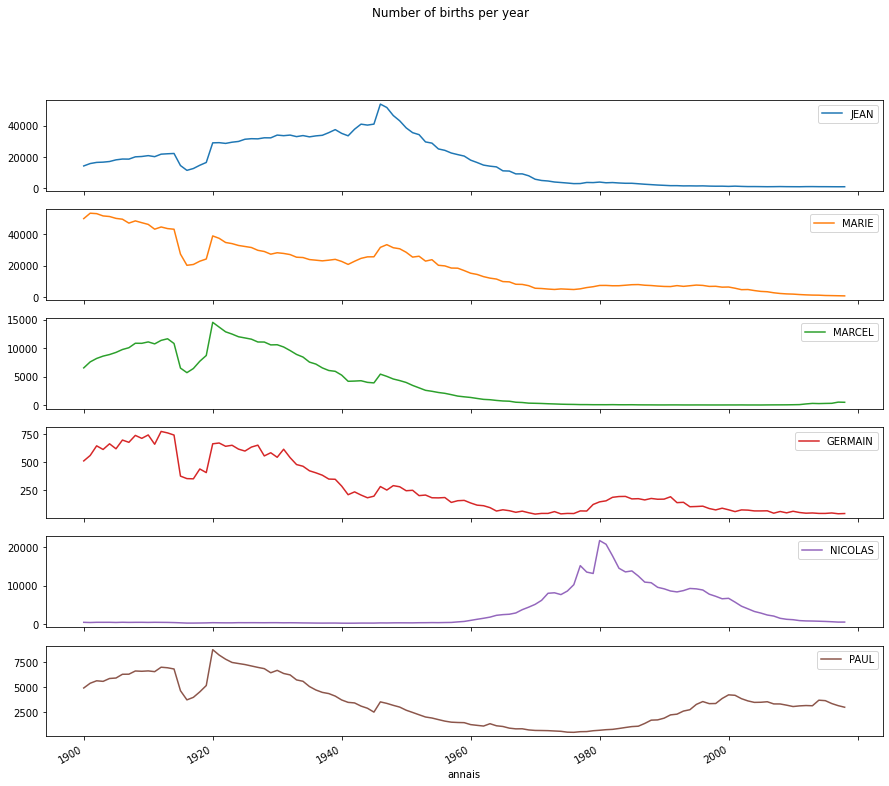

In [41]:
subset.plot(subplots=True,figsize=[15,13], grid=False, title="Number of births per year")

<AxesSubplot:title={'center':'Number of births per year'}, xlabel='annais'>

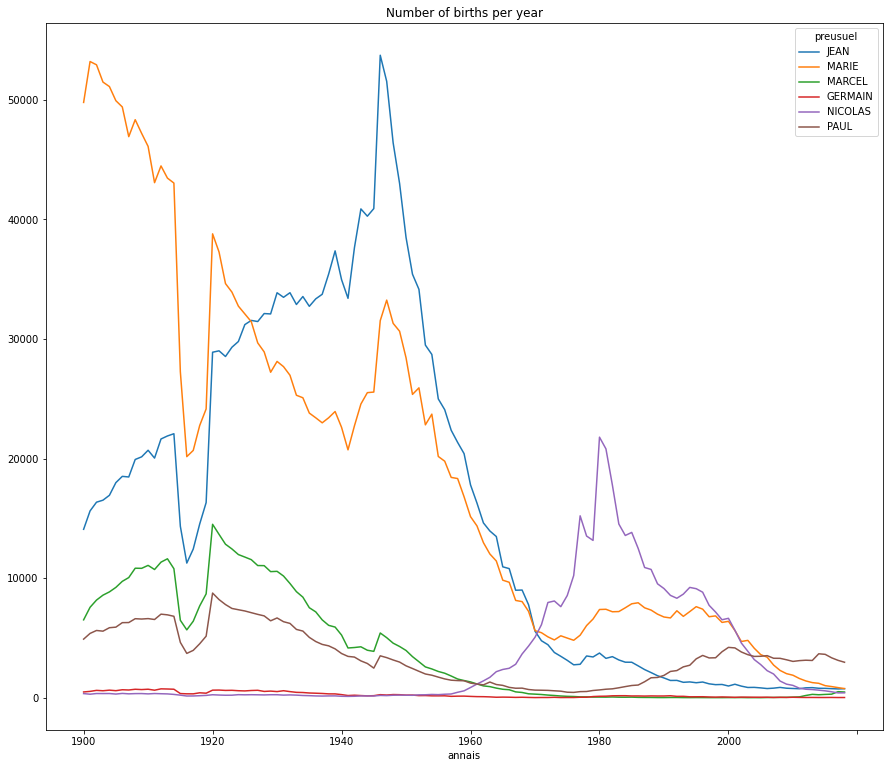

In [42]:
subset.plot(figsize=[15,13], grid=False, title="Number of births per year")

Pour exprimer la diversité des prénoms : 

nb de prénoms différents proportion du top1000 dans le nombre de total de naissance
par année et par sexe combien de prénoms pour atteindre 50% du volume total de naissance

# Proportion du top1000 dans le nombre total de naissances 

In [43]:
table = top1000.pivot_table('prop', index='annais', columns='sexe', aggfunc=sum)

<AxesSubplot:title={'center':'top 1000 proportion among total births by year and sex'}, xlabel='annais'>

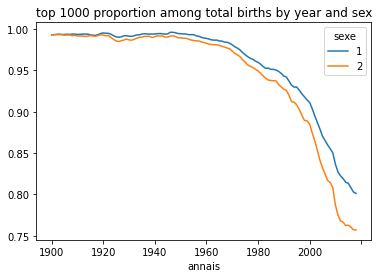

In [44]:
table.plot(title = "top 1000 proportion among total births by year and sex")

# DIVERSITY CHECK, method 2 : nb of distincs names, in order of popularity, to reach 50% of births

In [45]:
boys = nat[(nat.sexe==1) & (nat.preusuel != '_PRENOMS_RARES')]
boys

,sexe,preusuel,annais,nombre,prop
0,1,A,1980,3,0.000007
1,1,A,1998,3,0.000008
3,1,AADAM,2009,4,0.000010
4,1,AADAM,2014,3,0.000007
5,1,AADAM,2016,4,0.000010
6,1,AADAM,2017,4,0.000010
7,1,AADAM,2018,3,0.000008
9,1,AADEL,1976,5,0.000013
10,1,AADEL,1978,3,0.000008
11,1,AADEL,1980,3,0.000007


In [46]:
nblignes, nbcol = boys.shape
print(nblignes)
print(nbcol)

273864
5


# EXERCICE 1 : Sanity Check
## Automatize sanity check : let's compute total births in the max proportion year / total births

In [47]:
max_prop_line = nat.sort_values(by='prop')[-1:]
max_prop_line

,sexe,preusuel,annais,nombre,prop
499325,2,MARIE,1900,48713,0.204978


In [48]:
# get the year with the max proportion
year = max_prop_line.annais.iloc[0]
# get the name with the max proportion
name = max_prop_line.preusuel.iloc[0]
# get the sexe with the max proportion
sexe = max_prop_line.sexe.iloc[0]
# get the proportion itself with the max proportion
max_prop = max_prop_line.prop.iloc[0]
print(f'The maximum proportion computed is {max_prop} for {name} in {year}.')

The maximum proportion computed is 0.2049779086892489 for MARIE in 1900.


In [49]:
# do the sanity check
mask = (nat.annais == year) & (nat.sexe == sexe)
# number of births in annais {year} and sexe {sexe}
n_birth = nat[mask].nombre.sum()
# number of births for the preusuel {name} in annais {year} and sexe {sexe}
n_name = nat[mask & (nat.preusuel == name)].nombre.sum()
print(f'There are in {n_name} {name} in {year} for a total of {n_birth} births for {"boys" if sexe == 1 else "girls"}')
sanity_prop = n_name / n_birth
print(f'It corresponds to a proportion of {sanity_prop} :\033[1m TEST {"NOT " if (sanity_prop != max_prop) else ""}PASSED !')

There are in 48713 MARIE in 1900 for a total of 237650 births for girls
It corresponds to a proportion of 0.2049779086892489 : TEST PASSED !


## Automatize sanity check : let's compute total births in the min proportion year / total births

In [50]:
# display the min proportion
min_prop_line = nat.sort_values(by='prop')[:1]
min_prop_line

,sexe,preusuel,annais,nombre,prop
87754,1,FLOREAL,1971,3,0.000006


In [51]:
# get the year with the min proportion
year = min_prop_line.annais.iloc[0]
# get the name with the min proportion
name = min_prop_line.preusuel.iloc[0]
# get the sexe with the min proportion
sexe = min_prop_line.sexe.iloc[0]
# get the proportion itself with the min proportion
min_prop = min_prop_line.prop.iloc[0]
print(f'The minimum proportion computed is {min_prop} for {name} in {year}.')

The minimum proportion computed is 6.442883834804459e-06 for FLOREAL in 1971.


In [52]:
# do the sanity check
mask = (nat.annais == year) & (nat.sexe == sexe)
# number of births in annais {year} and sexe {sexe}
n_birth = nat[mask].nombre.sum()
# number of births for the preusuel {name} in annais {year} and sexe {sexe}
n_name = nat[mask & (nat.preusuel == name)].nombre.sum()
print(f'\nThere are in {n_name} {name} in {year} for a total of {n_birth} births for {"boys" if sexe == 1 else "girls"}')
sanity_prop = n_name / n_birth
print(f'It corresponds to a proportion of {sanity_prop} :\033[1m TEST {"NOT " if (sanity_prop != min_prop) else ""}PASSED !')


There are in 3 FLOREAL in 1971 for a total of 465630 births for boys
It corresponds to a proportion of 6.442883834804459e-06 : TEST PASSED !


# EXERCICE 2 : Verification
## Verify that total nb of boys lines = total nb of lines in dataframe - total number of girls lines

In [55]:
n_line_boys = boys.shape[0]
print(f'There are {n_line_boys} lines for the boys (without rare firstnames)')

There are 273864 lines for the boys (without rare firstnames)


In [58]:
# do the sanity check
n_line = nat[(nat.preusuel != '_PRENOMS_RARES')].shape[0]  # number of lines
n_line_girls = nat[(nat.sexe == 2) & (nat.preusuel != '_PRENOMS_RARES')].shape[0]  # number of lines for the girls
print(f'There are {n_line_girls} lines for the girls in a {n_line}-lines dataset (without rare firstnames)')
sanity_n_line_boys = n_line - n_line_girls
print(f'It corresponds to have {sanity_n_line_boys} lines of boys:\033[1m TEST {"NOT " if (sanity_n_line_boys != n_line_boys) else ""}PASSED !')

There are 327359 lines for the girls in a 601223-lines dataset (without rare firstnames)
It corresponds to have 273864 lines of boys: TEST PASSED !
